In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread # 이미지를 읽어 들인다.
from skimage.transform import resize # 이미지의 크기를 변경할 수 있다.
from skimage.feature import hog # Histogram of Gradient 계산, 이미지 객체 검출위한 패키지 

- 데이터 준비 

<Figure size 432x288 with 0 Axes>

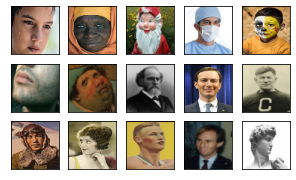

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1) #이미지 파일 이름을 만든다.
    img = imread(file)  # 이미지를 읽는다.
    img = resize(img, (64,64))  # 이미지의 크기를 변경한다.
    face_images.append(img) # face_images에 담는다.


def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])


plot_images(3,5, face_images)


- 얼굴 이미지의 특징 데이터 구하기 (얼굴 이미지의 중요한 특징만 추출)

(128,)


<Figure size 432x288 with 0 Axes>

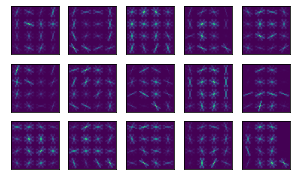

<Figure size 432x288 with 0 Axes>

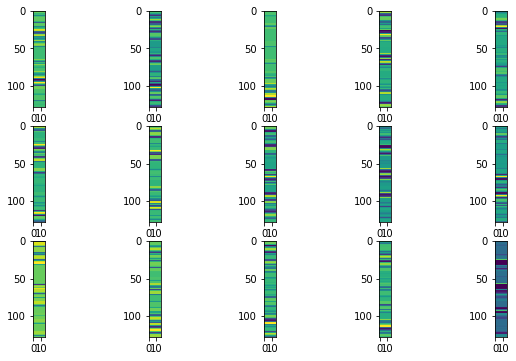

In [ ]:
face_hogs = [] # 이미지를 담을 배열
face_features = [] # 디스크립터를 담을 배열

for i in range(15): # 15장의 얼굴 이미지
    hog_desc, hog_image = hog(face_images[i], orientations=8,#히스토그램을 만들 방향 8방향으로 지정 
                              pixels_per_cell=(16, 16), cells_per_block=(1, 1), #이미지의 크기를 16X16으로 쪼갬 
                              visualize=True, multichannel=True) #이미지의 기울기 히스토그램을 사용 (hog 함수), 8방향, 16x16 크기, multichannel=True 컬러 채널 
    face_hogs.append(hog_image) # 배열에 저장
    face_features.append(hog_desc) # 배열에 저장

plot_images(3, 5, face_hogs)  # 하나의 이미지 마다 16개의 블록이 존재하는것을 가시화 

print(face_features[0].shape) # 특징 벡터, 한블록당 8개의 방향 정보 이므로 16X8 =128

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(face_features[i*5+j], (128,16))) #각 이미지를 설명하는 특징벡터 볼수있게 가시화 

- 사람 얼굴이 아닌 이미지의 특징 벡터 준비 

<Figure size 432x288 with 0 Axes>

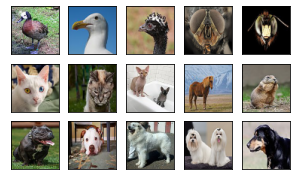

In [ ]:
# 동물 사진 불러오기
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3, 5, animal_images)

<Figure size 432x288 with 0 Axes>

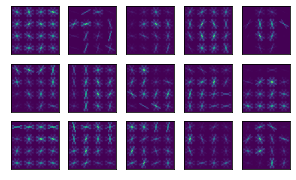

<Figure size 432x288 with 0 Axes>

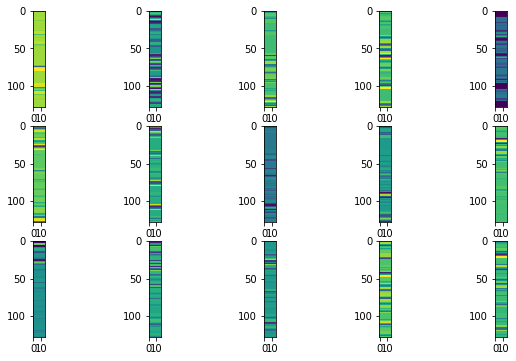

In [ ]:
# 사람 얼굴이 아닌 이미지의 특징 벡터 준비
animal_hogs = []
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)

plot_images(3, 5, animal_hogs)

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
 for j in range(5):
   ax[i, j].imshow(resize(animal_features[i*5+j], (128,16)))

- 학습을 위한 데이터 만들어 학습하기

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 432x288 with 0 Axes>

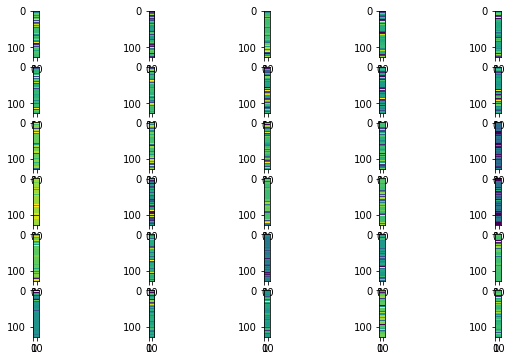

In [ ]:
X, y = [], []

for feature in face_features: # 사람 얼굴은 레이블 1
    X.append(feature)
    y.append(1)
for feature in animal_features: # 사람 얼굴이 아니면 레이블 0
    X.append(feature)
    y.append(0)

fig = plt.figure()
fig, ax = plt.subplots(6,5, figsize = (10,6))
for i in range(6):
 for j in range(5):
   ax[i, j].imshow(resize(X[i*5+j], (128,16)),interpolation='nearest')
print(y) # 30개의 레이블이 1과 0으로 채워져 있음

In [ ]:
#SVM을 사용하여 학습
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel = 'poly', degree=5, coef0=10.0)) #커널 트릭 사용
 ])
polynomial_svm_clf.fit(X, y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=10.0, decision_function_shape='ovr', degree=5,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
yhat = polynomial_svm_clf.predict(X) # 학습된 모델로 훈련 데이터에 대한 예측 수행을 하고 얻은 결과물 
print(yhat) #원래의 레이블과 동일한 결과가 나오면 학습이 잘 되었다는 것을 의미

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

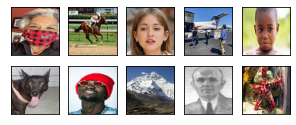

In [ ]:
# 새로운 데이터에 적용 
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

plot_images(2, 5, test_images)

<Figure size 432x288 with 0 Axes>

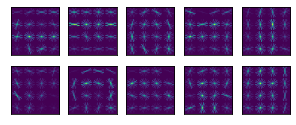

<Figure size 432x288 with 0 Axes>

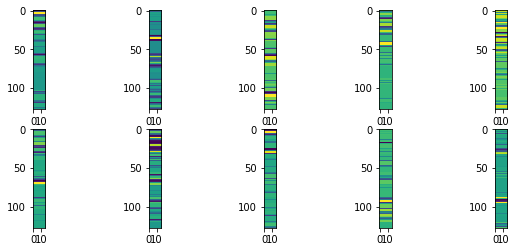

In [ ]:
test_hogs = []
test_features = []
for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    test_hogs.append(hog_image)
    test_features.append(hog_desc)

plot_images(2, 5, test_hogs)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
 for j in range(5):
   ax[i, j].imshow(resize(test_features[i*5+j], (128,16)), interpolation='nearest')


In [ ]:
test_result = polynomial_svm_clf.predict(test_features) #학습한 모델을 사용해 예측 수행 
print(test_result)

[1 0 1 0 0 0 0 0 1 0]


<Figure size 432x288 with 0 Axes>

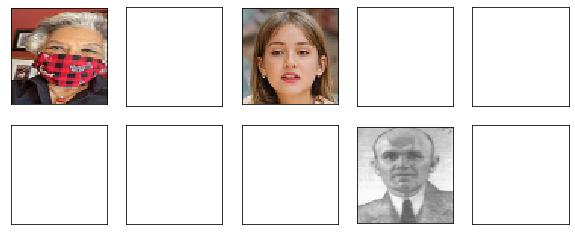

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] == 1:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')
#5개의 얼굴 이미지 중 3개를 찾아낸것을 알 수 있음